In [5]:
#### Importing Libraries ####

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier



In [6]:
### read the data set 

df_HR = pd.read_excel(r"C:/Users/HP/Desktop/dataset/ibm_hr_attrition.xls")
df_HR.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [7]:
## check the last 5 rows of the data set 

df_HR.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,...,1,80,0,6,3,4,4,3,1,2


In [8]:
### let's check the basic infomation of the date set like data-type and shape of the data set

df_HR.info()

## here we can find that 31 columns and 1470 rows  (int64(22), object(9)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [10]:
df_HR.shape

(1470, 31)

In [11]:
### check the missing value of the dataset column wise or total

print(" NaN value in the data set column wise :- \n " )
print(df_HR.isnull().sum())
print()
print(" Total NaN value in the data set  :- \n " )
df_HR.isnull().sum().sum()


## Here we find that no there in no missing value present in the data set

 NaN value in the data set column wise :- 
 
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

 Total NaN 

0

In [12]:
### Check duplicate rows #########

df_HR[df_HR.duplicated(keep='first')].shape

(0, 31)

### Check Column Values


In [17]:
df_HR.drop(['EmployeeNumber'], axis = 1, inplace = True)

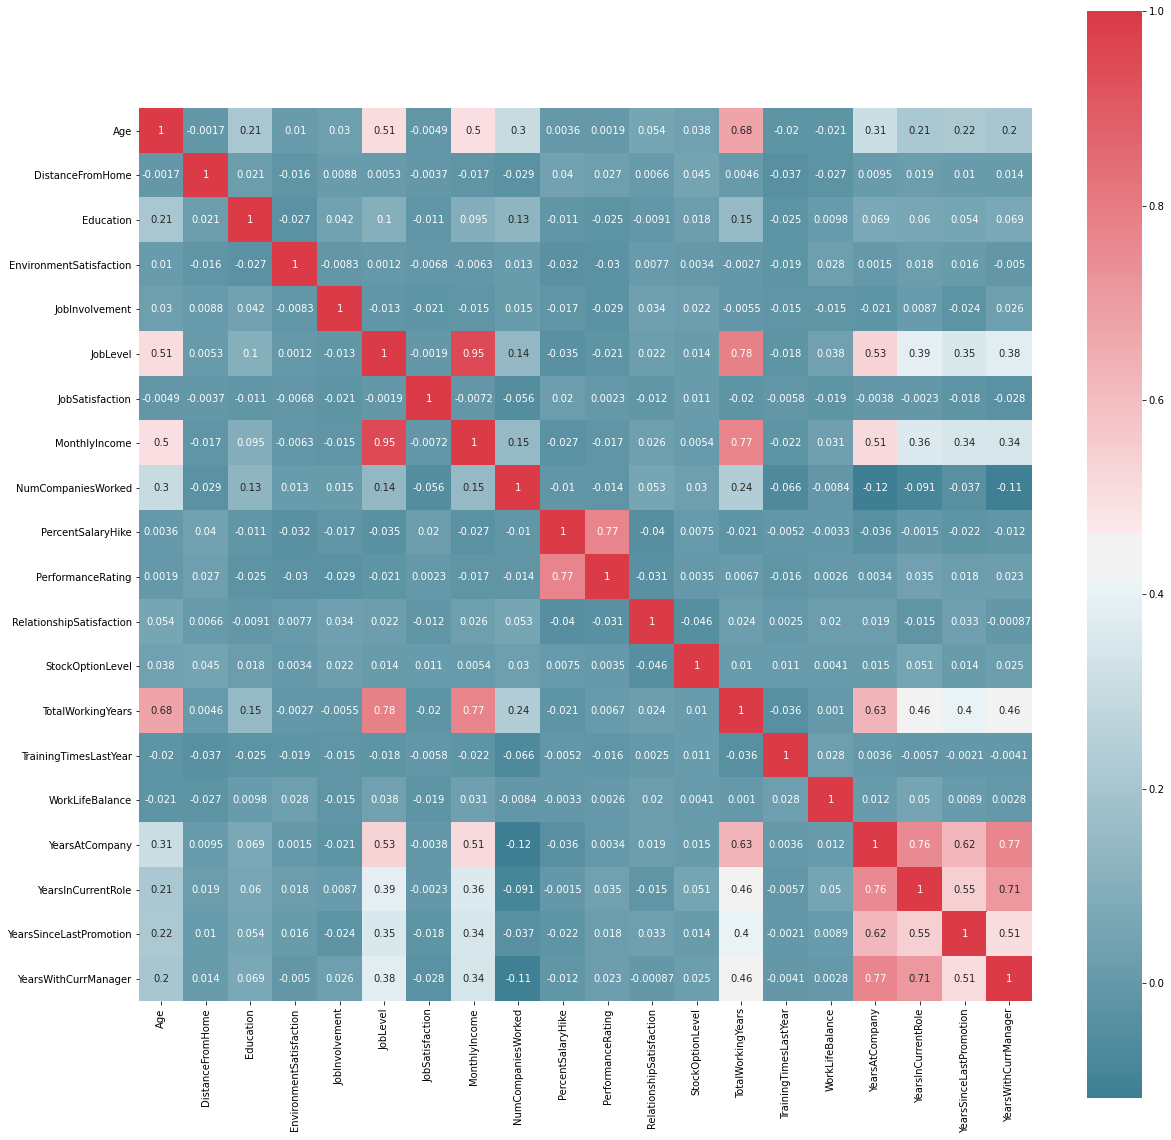

In [18]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df_HR.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [24]:
df_HR['Male'] = df_HR.Gender == 'Male'
df_HR.drop('Gender', axis = 1,inplace=True)

df_HR['OverTime'] = df_HR.OverTime == 'Yes'
df_HR['Attrition'] = df_HR.Attrition == 'Yes'

### Exploratory Data Visualization


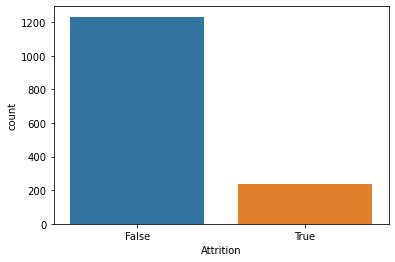

In [26]:
 

sns.countplot(x='Attrition', data=df_HR)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


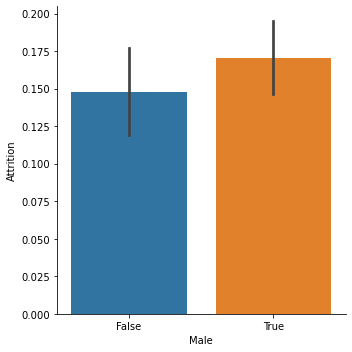

In [28]:
sns.factorplot(x = 'Male', y='Attrition', kind = 'bar', data=df_HR)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


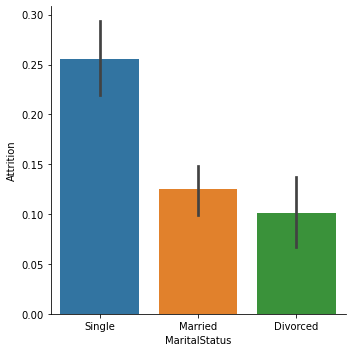

In [31]:
# let's check 

sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df_HR

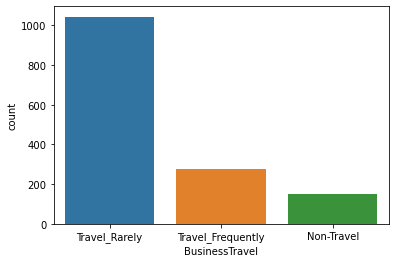

In [40]:
#Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=df_HR)
plt.show()


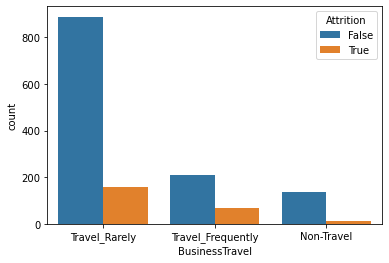

In [41]:
#Lets see the count of each category of buisness travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df_HR,hue="Attrition")
plt.show()


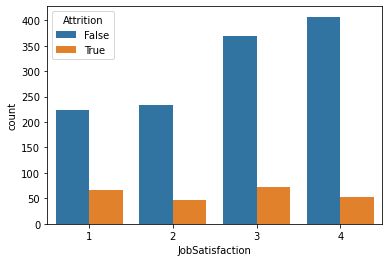

In [47]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=df_HR,hue="Attrition")
plt.show()
#here we are able  to see that as job satisfaction increases proportion of aleavers decreases

In [51]:
#lets chcek the skewness in the dataset
print(df_HR.skew())
print("Total count of numeric features: ",len(df_HR.skew()))
print("count of features which are significantly skewed: ",len(df_HR.skew().loc[abs(df_HR.skew())>0.5]))

Age                         0.413286
Attrition                   1.844366
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
Male                       -0.408665
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  16


In [53]:
#lets seprate the input and output column
X=df_HR.drop(columns=["Attrition"])
Y=df_HR[["Attrition"]]

In [56]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,3,2,Sales Executive,...,1,0,8,0,1,6,4,0,5,False
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,2,Research Scientist,...,4,1,10,3,3,10,7,1,7,True
2,37,Travel_Rarely,Research & Development,2,2,Other,4,2,1,Laboratory Technician,...,2,0,7,3,3,0,0,0,0,True
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,3,1,Research Scientist,...,3,0,8,3,3,8,7,3,0,False
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,3,1,Laboratory Technician,...,4,1,6,3,3,2,2,2,2,True


In [57]:
Y.head()

,Attrition
0,True
1,False
2,True
3,False
4,False


In [58]:
#lets treat the skewness in the input dataset
import numpy as np
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

In [59]:
#Lets again check the skewness
print(X.skew())
print("Total count of numeric features: ",len(X.skew()))
print("count of features which are significantly skewed: ",len(X.skew().loc[abs(X.skew())>0.5]))
#Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

Age                         0.413286
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
NumCompaniesWorked          0.092896
OverTime                    0.964355
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
Male                       -0.408665
dtype: float64
Total count of numeric features:  22
count of features which are significantly skewed:  4


In [60]:
#Lets count the number of columns of object datatype
print(X.dtypes.loc[X.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
JobRole           object
MaritalStatus     object
dtype: object


In [61]:

#we need to convert above columns to 1 and 0 using pd.get_dummies
X=pd.get_dummies(X,drop_first=True)

In [62]:
#lets see df_x
X.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,0.693147,2,2,3,1.098612,4,8.698514,2.197225,0.693359,...,0,0,0,0,0,0,1,0,0,1
1,49,2.197225,1,3,2,1.098612,2,8.543056,0.693147,0.000000,...,0,0,0,0,0,1,0,0,1,0
2,37,1.098612,2,4,2,0.693147,3,7.645398,1.945910,0.693359,...,0,1,0,0,0,0,0,0,0,1
3,33,1.386294,4,4,3,0.693147,3,7.975908,0.693147,0.693359,...,0,0,0,0,0,1,0,0,1,0
4,27,1.098612,1,1,3,0.693147,2,8.151622,2.302585,0.000000,...,0,1,0,0,0,0,0,0,1,0


In [63]:
#Lets bring features to common scale as we will use logistic regression also
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
x=sc.transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [64]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(Y)
y=le.transform(Y)
y


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [71]:
#Lets use logistic regression and check
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7093203548970627
auc roc score corresponding to  43  is  0.7964510293737617
auc roc score corresponding to  44  is  0.7660435868722542
auc roc score corresponding to  45  is  0.7153932293909898
auc roc score corresponding to  46  is  0.7478249633904729
auc roc score corresponding to  47  is  0.7615212335257129
auc roc score corresponding to  48  is  0.7533809975019382
auc roc score corresponding to  49  is  0.7437763803945215
auc roc score corresponding to  50  is  0.8080799379791541
auc roc score corresponding to  51  is  0.8106641398914636
auc roc score corresponding to  52  is  0.7954604186407097
auc roc score corresponding to  53  is  0.8187182358514945
auc roc score corresponding to  54  is  0.7386941166336461
auc roc score corresponding to  55  is  0.741235248514084
auc roc score corresponding to  56  is  0.7756912740115428
auc roc score corresponding to  57  is  0.7473081230080111
auc roc score corresponding to  58  is  0.708329744164010

70

In [72]:
#lets use cross_val_score
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8445093821469699
standard deviation in roc auc score for logistic classifier:  0.017882991140092012
[0.84027778 0.85044038 0.83822896 0.81945043 0.87414937]
